<a href="https://colab.research.google.com/github/khj0917000/khj0917/blob/master/project_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/trip.csv')
display(data.head())

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [ ]:
#결측치 판단 및 처리
#[힌트] 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [ ]:
data.isna( )

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22696,False,False,False,False,False,False,False,False,False
22697,False,False,False,False,False,False,False,False,False
22698,False,False,False,False,False,False,False,False,False
22699,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [ ]:
round(data['fare_amount'].isnull().mean() * 100, 2)
 #결측치 비율 확인


np.float64(0.01)

In [ ]:
fare_amount_na_index=data[data['fare_amount'].isna()].index
fare_amount_na_index  #결측지가 있는 줄 확인하기


Index([52, 189, 244], dtype='int64')

In [ ]:
data.loc[fare_amount_na_index]
#null 값 갯수 확인


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [ ]:
# 결측치 처리 - 중앙값으로 대체 채우기
data['fare_amount'] = data['fare_amount'].fillna(data['fare_amount'].median())
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.023543,1.835745,0.312514
std,1.304942,3.653023,13.239261,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


passenger_count : min=0, max=36, mean≈1.64  
trip_distance   : min=0, max≈33.96, mean≈2.91  
fare_amount     : min=-120, max≈999.99, mean≈13.02  
tip_amount      : max=200  
tolls_amount    : max=19.1

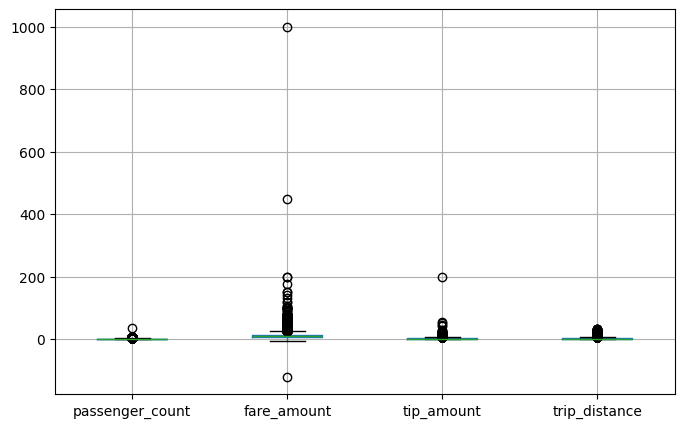

In [ ]:
import matplotlib.pyplot as plt #이상치 시각화

data[['passenger_count', 'fare_amount', 'tip_amount', 'trip_distance']].boxplot(figsize=(8,5))
plt.show()

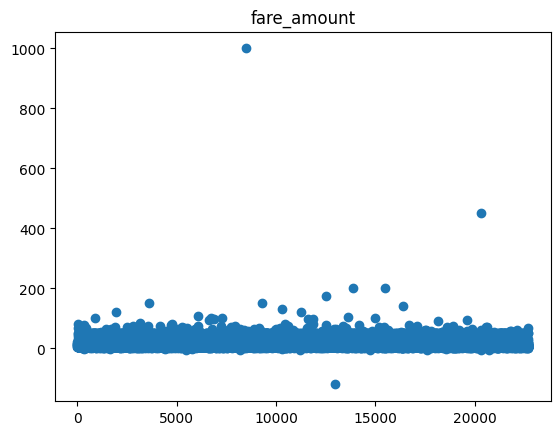

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['fare_amount'])
plt.title('fare_amount')
plt.show()

AttributeError: PathCollection.set() got an unexpected keyword argument 'z'

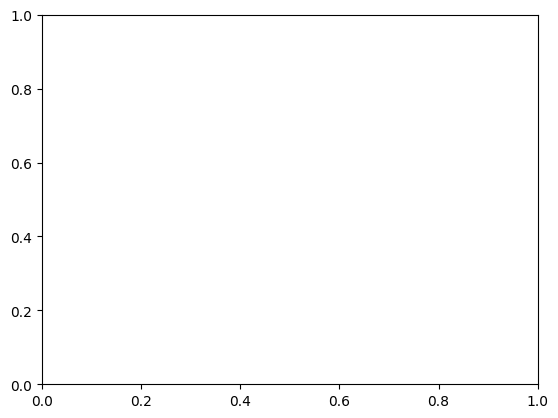

In [ ]:
import seaborn as sns
corr_matrix = data[['fare_amount', 'tip_amount', 'trip_distance']].corr()
sns.scatterplot(x = data['fare_amount'],y = data['tip_amount'], z = data['trip_distance'])

In [ ]:
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

ddata = data[(data['fare_amount'] >= Q1 - 1.5*IQR) &
            (data['fare_amount'] <= Q3 + 1.5*IQR)]

In [ ]:
cols = ['fare_amount', 'tip_amount', 'trip_distance']

# 각 컬럼마다 IQR 방식으로 이상치 제거
for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower) & (data[col] <= upper)]

print(data.shape)
display(data.head())

(19120, 9)


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.0,2.06,0.0


In [ ]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])